In [8]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from poseutils.props import calculate_limb_lengths
from poseutils.props import get_angles_from_joints
from poseutils.props import get_joints_from_angles
from poseutils.view import draw_skeleton
from poseutils.constants import adjacency_matrix

In [2]:
print(adjacency_matrix(14))

[[1, 4, 7], [2], [3], [], [5], [6], [], [8, 11], [9], [10], [], [12], [13], []]


In [3]:
indices_to_select = [0, 2, 5, 8, 1, 4, 7, 12, 16, 18, 20, 17, 19, 21]
dpath = "/home/saad/Personal/Research/Dataset/CrossDataset/3dpw_wo_invalid.npz"
data = np.load(dpath, allow_pickle=True, encoding='latin1')['data'].item()
data_3d = data['train']['combined_3d_cam'][:, indices_to_select, :]
data_2d = data['train']['combined_2d'][:, indices_to_select, :]

In [6]:
angles_3d, _ = get_angles_from_joints(data_3d[0, :, :])
limb_length = calculate_limb_lengths(data_3d[0, :, :])
joints_3d = get_joints_from_angles(angles_3d, limb_length)

<IPython.core.display.Javascript object>


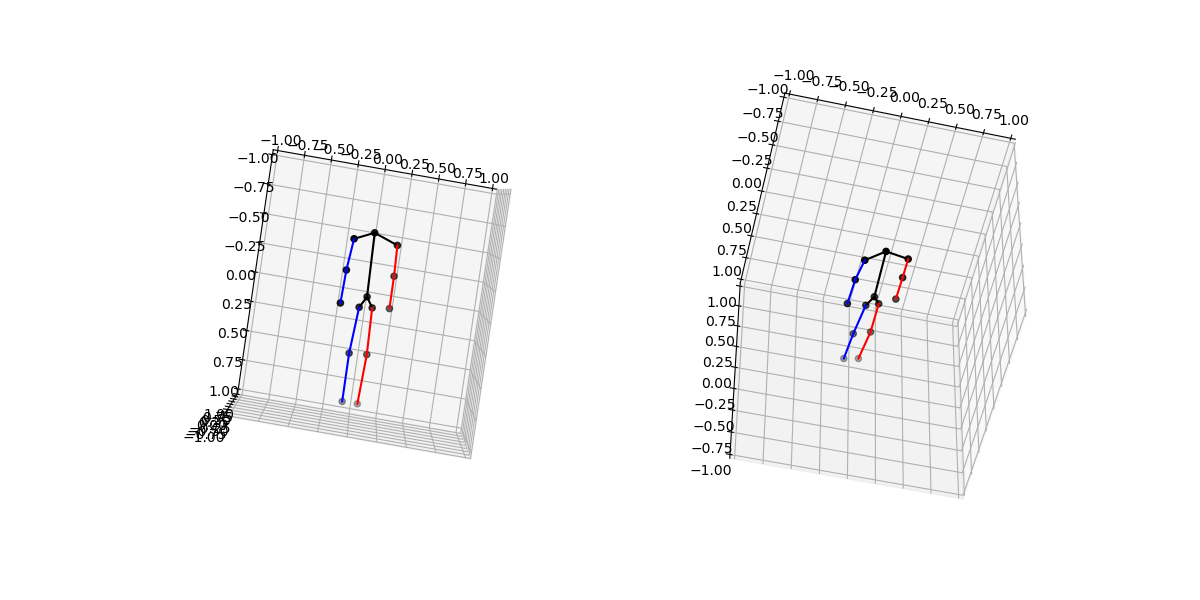

In [9]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d', xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))
bx = fig.add_subplot(122, projection='3d', xlim=(-1, 1), ylim=(-1, 1), zlim=(-1, 1))

draw_skeleton(data_3d[0, :, :] - data_3d[0, 0, :], ax)
draw_skeleton(joints_3d, bx)

plt.show()